In [1]:
# In Anaconda, you must pip install ipympl and some widgit-related packages before using this motebook, 
# see https://cs.uwaterloo.ca/~yboykov/Courses/cs484/libraries.html
# In Google Colab, uncomment three lines of code below 
# from google.colab import output
# output.enable_custom_widget_manager()
# !pip install ipympl

In [2]:
import numpy as np
import matplotlib
import matplotlib.image as image
import matplotlib.pyplot as plt

%matplotlib widget   
# Equivalently, one can call "%matplotlib ipympl" instead of "%matplotlib widget" to activate ipympl backend for interactive plotting 
# This alternative for the default "inline" backend requires "ipympl" package, see https://matplotlib.org/ipympl/installing.html)
# see  http://ipython.readthedocs.io/en/stable/interactive/plotting.html for details

# Basic image operations (loading, drawing, cropping)

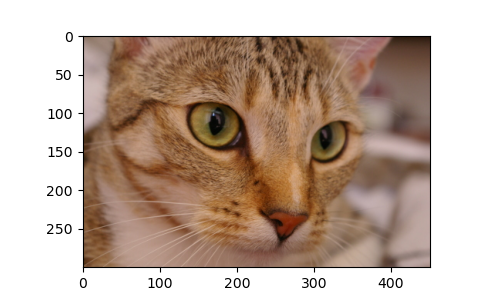

In [3]:
from skimage import data

im = data.cat()     # a sample image in misc library

#imA=image.imread("../images/IMG_3306.jpg") # another sample image (loaded from your own file), uncomment one of the two

plt.figure(1,figsize = (5, 3))
plt.imshow(im)
plt.show()

#### Accessing image and pixel attributes

In [4]:
print ("image width,height, and intensity dimensions = ",im.shape)
print ("color of pixel (100,200) = ", im[100,200])
print ("G for pixel(100,200) = ", im[100, 200, 1])

image width,height, and intensity dimensions =  (300, 451, 3)
color of pixel (100,200) =  [76 39 13]
G for pixel(100,200) =  39


#### Slicing images

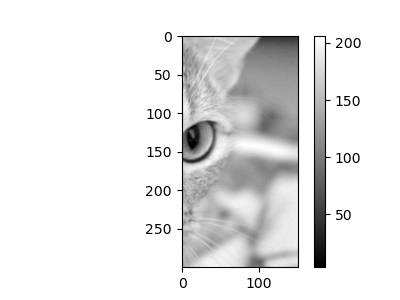

In [5]:
plt.figure(2,figsize = (4, 3))
plt.imshow(im[:,300:900,0],cmap='gray')  # Slice operator : is used to indicate the range of raws, columns, etc.
plt.colorbar()                           # Its typical format is [start:stop] or [start:stop:step] with defaults "None"
plt.show()

# Intensity histograms

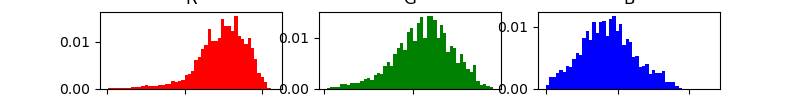

In [6]:
R = np.reshape(im[:,:,0],im.shape[0]*im.shape[1])  # generating a sequence of intensities (R channel)
G = np.reshape(im[:,:,1],im.shape[0]*im.shape[1])  # generating a sequence of intensities (G channel)
B = np.reshape(im[:,:,2],im.shape[0]*im.shape[1])  # generating a sequence of intensities (B channel)

plt.figure(3,figsize = (8, 1))
plt.subplot(131)
plt.hist(R, 50, density=True, facecolor='r')       # matplotlib version (plot)
plt.title("R")
plt.subplot(132)
plt.hist(G, bins=50, density=True,  facecolor='g')       # matplotlib version (plot)
plt.title("G")
plt.subplot(133)
plt.hist(B, bins=50, density=True,  facecolor='b')       # matplotlib version (plot)
plt.title("B")
plt.show()

# Built-in filters

In [7]:
from scipy import ndimage

# converting to gray scale (leaving only R channel)
imR = im[:,:,0] 

blurred = ndimage.gaussian_filter(imR, sigma=3)
very_blurred = ndimage.gaussian_filter(imR, sigma=5)

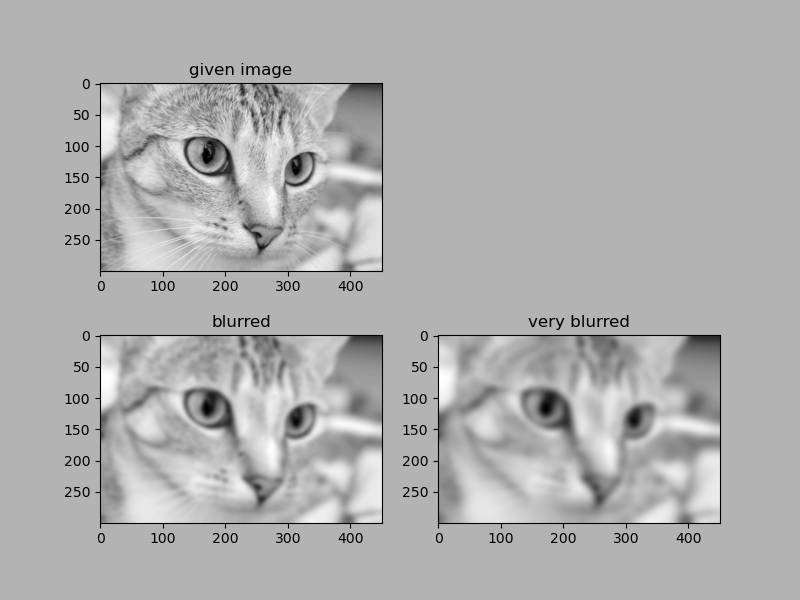

In [8]:
plt.figure(4,figsize = (8, 6),facecolor = '0.7')
plt.subplot(221)
plt.imshow(imR, cmap = 'gray')
plt.title('given image')
plt.subplot(223)
plt.imshow(blurred, cmap = 'gray')
plt.title('blurred')
plt.subplot(224)
plt.imshow(very_blurred, cmap = 'gray')
plt.title('very blurred')
plt.show()

# Generating noise

In [9]:
# generating image with gaussian noise
sigma = 30.0
gauss = np.random.normal(0.0,sigma,(imR.shape[0],imR.shape[1]))  # Gaussian noise array of given shape
gauss_im = blurred + gauss         # additive Gaussian/Normal noise

# generating image with salt-&-pepper noise (only pepper part) 
pool = [0.0,1.0]     # pool of numbers for sampling
prob = [0.2,0.8] # probabilities of these numbers
pepper = np.random.choice(pool,(imR.shape[0],imR.shape[1]), p = prob)  # Bernoulli noise (as array)
pepper_im = blurred * pepper   # value 1 in pepper keeps intensity in "blurred", 0 reduces it to zero

##### visualizing noise data

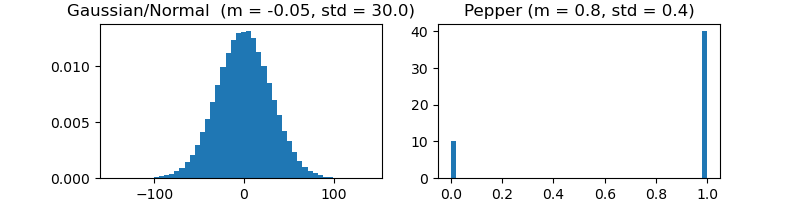

In [10]:
noiseG = np.reshape(gauss,im.shape[0]*im.shape[1]) # generating a sequence from array
noiseP = np.reshape(pepper,im.shape[0]*im.shape[1])           # generating a sequence from array

plt.figure(5,figsize = (8, 2))
plt.subplot(121)
plt.hist(noiseG, bins=50, density=True)  
plt.title("Gaussian/Normal  (m = %1.2f, std = %2.1f)" % (np.mean(noiseG),np.std(noiseG)))
plt.subplot(122)
plt.hist(noiseP, bins=50, density=True) 
plt.title("Pepper (m = %1.1f, std = %1.1f)" % (np.mean(noiseP),np.std(noiseP)))
plt.show()

# Image denoising

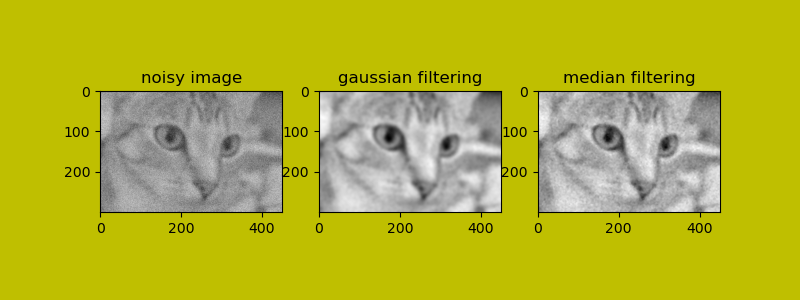

In [11]:
test_im = gauss_im    # choose either gaus_im or pepper_im
denoised_gauss = ndimage.gaussian_filter(test_im, sigma=3)
denoised_med = ndimage.median_filter(test_im, 5)

plt.figure(6,figsize = (8, 3),facecolor = 'y')
plt.subplot(131)
plt.imshow(test_im, cmap = 'gray')
plt.title('noisy image')
plt.subplot(132)
plt.imshow(denoised_gauss, cmap = 'gray')
plt.title('gaussian filtering')
plt.subplot(133)
plt.imshow(denoised_med, cmap = 'gray')
plt.title('median filtering')
plt.show()

# Image sharpenning

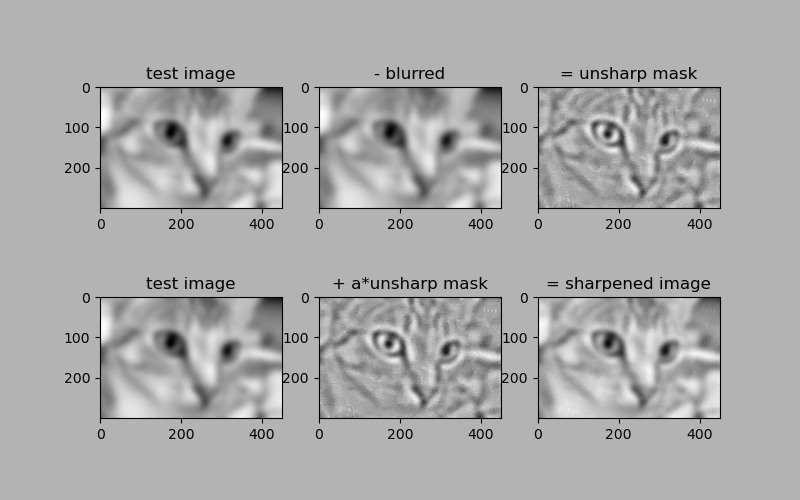

In [12]:
test = ndimage.gaussian_filter(imR, sigma=8)
blurred = ndimage.gaussian_filter(test, sigma=3)

unsharp = test - 1.0*blurred  # 1.0 factor converts to "float"
sharp = test + 10.0*unsharp

plt.figure(7,figsize = (8, 5),facecolor = '0.7')
plt.subplot(231)
plt.imshow(test, cmap = 'gray')
plt.title('test image')
plt.subplot(232)
plt.imshow(blurred, cmap = 'gray')
plt.title('- blurred')
plt.subplot(233)
plt.imshow(unsharp, cmap = 'gray')
plt.title('= unsharp mask')
plt.subplot(234)
plt.imshow(test, cmap = 'gray')
plt.title('test image')
plt.subplot(235)
plt.imshow(unsharp, cmap = 'gray')
plt.title('+ a*unsharp mask')
plt.subplot(236)
plt.imshow(sharp, cmap = 'gray')
plt.title('= sharpened image')
plt.show()

#### "Unsharp mask" kernel, a.k.a. DOG or Difference of Gaussians: $(1+\alpha)G_{\sigma_1} - \alpha G_{\sigma_2}$

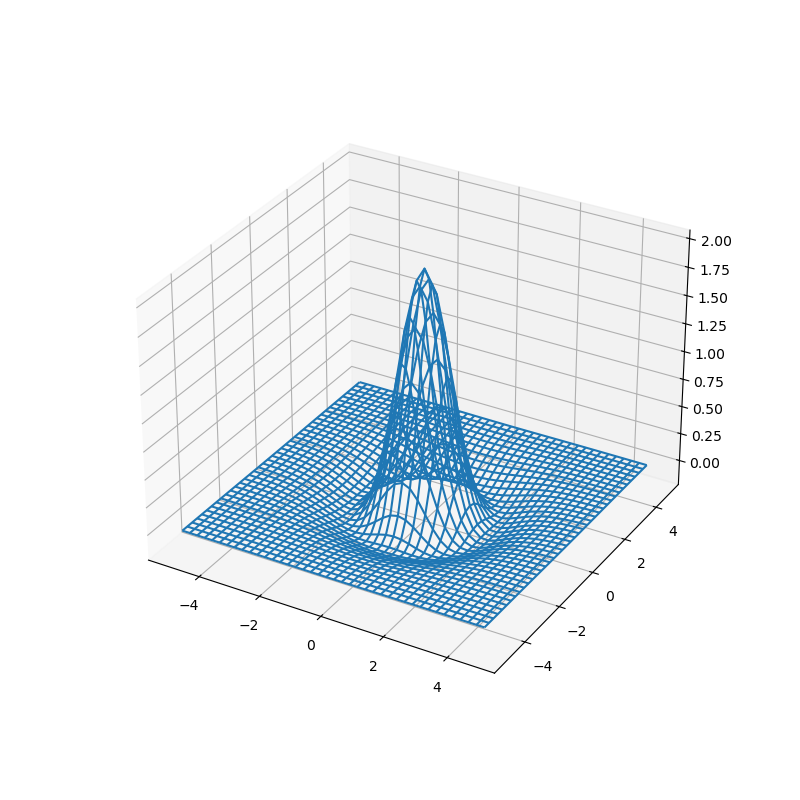

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import math

# "notebook" is an alternative to the default "inline" for "matplotlib magic" creating "interactive" plots.
# (the second call below may prevent some graphics errors)
%matplotlib widget

X, Y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))

alpha = 10.0
sigma1 = 0.8
sigma2 = 1.5
G1 = (1/(2*math.pi*sigma1*sigma1))*np.exp(-(X**2 + Y**2)/(2*sigma1*sigma1))
G2 = (1/(2*math.pi*sigma2*sigma2))*np.exp(-(X**2 + Y**2)/(2*sigma2*sigma2))
DOG = (1+alpha)*G1 - alpha*G2

fig = plt.figure(8,figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, DOG, rstride=1, cstride=1)

plt.show()

### NOTE: bivariate Gaussian/Normal probability density:  $G_\sigma(x,y)=\frac{1}{2\pi\sigma^2} \exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$ 
(this formula is for the special simple case of independent $x$ and $y$ with zero means and the same variance $\sigma$)

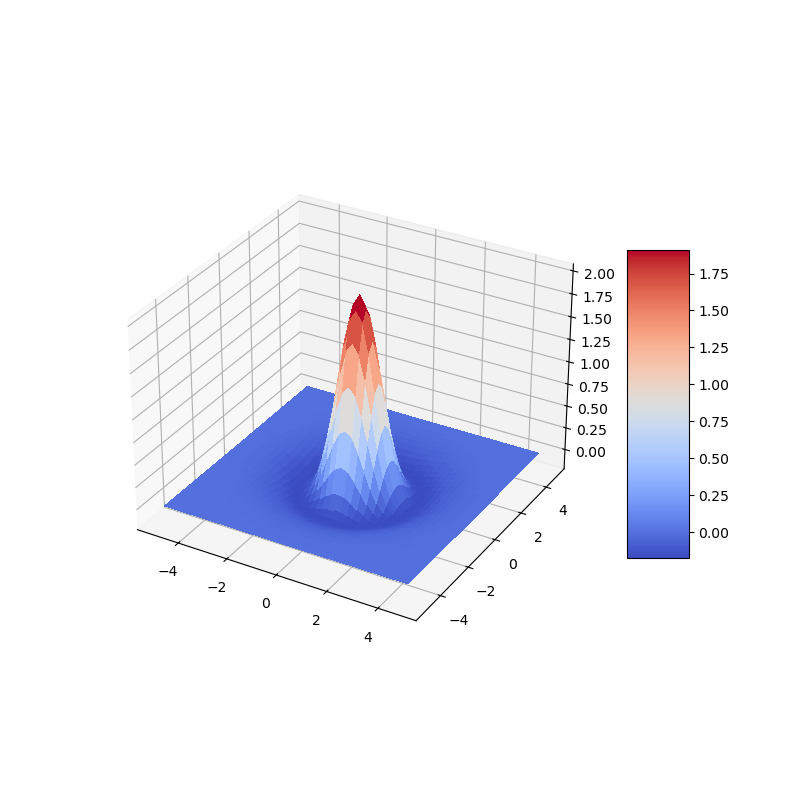

In [14]:
# another 3D plot style

fig = plt.figure(9,figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, DOG, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()